In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_olivetti_faces 
data = fetch_olivetti_faces() 

In [6]:
data.keys() 


dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
print("Data Shape:", data.data.shape) 
print("Target Shape:", data.target.shape) 
print("There are {} unique persons in the dataset".format(len(np.unique(data.target)))) 
print("Size of each image is {}x{}".format(data.images.shape[1],data.images.shape[1])) 

Data Shape: (400, 4096)
Target Shape: (400,)
There are 40 unique persons in the dataset
Size of each image is 64x64


In [9]:
def print_faces(images, target, top_n): 
    top_n = min(top_n, len(images)) 
    grid_size = int(np.ceil(np.sqrt(top_n))) 
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15)) 

 
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.2, wspace=0.2) 
 
    for i, ax in enumerate(axes.ravel()): 
        if i < top_n: 
            ax.imshow(images[i], cmap='bone') 
            ax.axis('off') 
            ax.text(2, 12, str(target[i]), fontsize=9, color='red') 
            ax.text(2, 55, f"face: {i}", fontsize=9, color='blue') 
        else: 
            ax.axis('off') 
 
    plt.show()

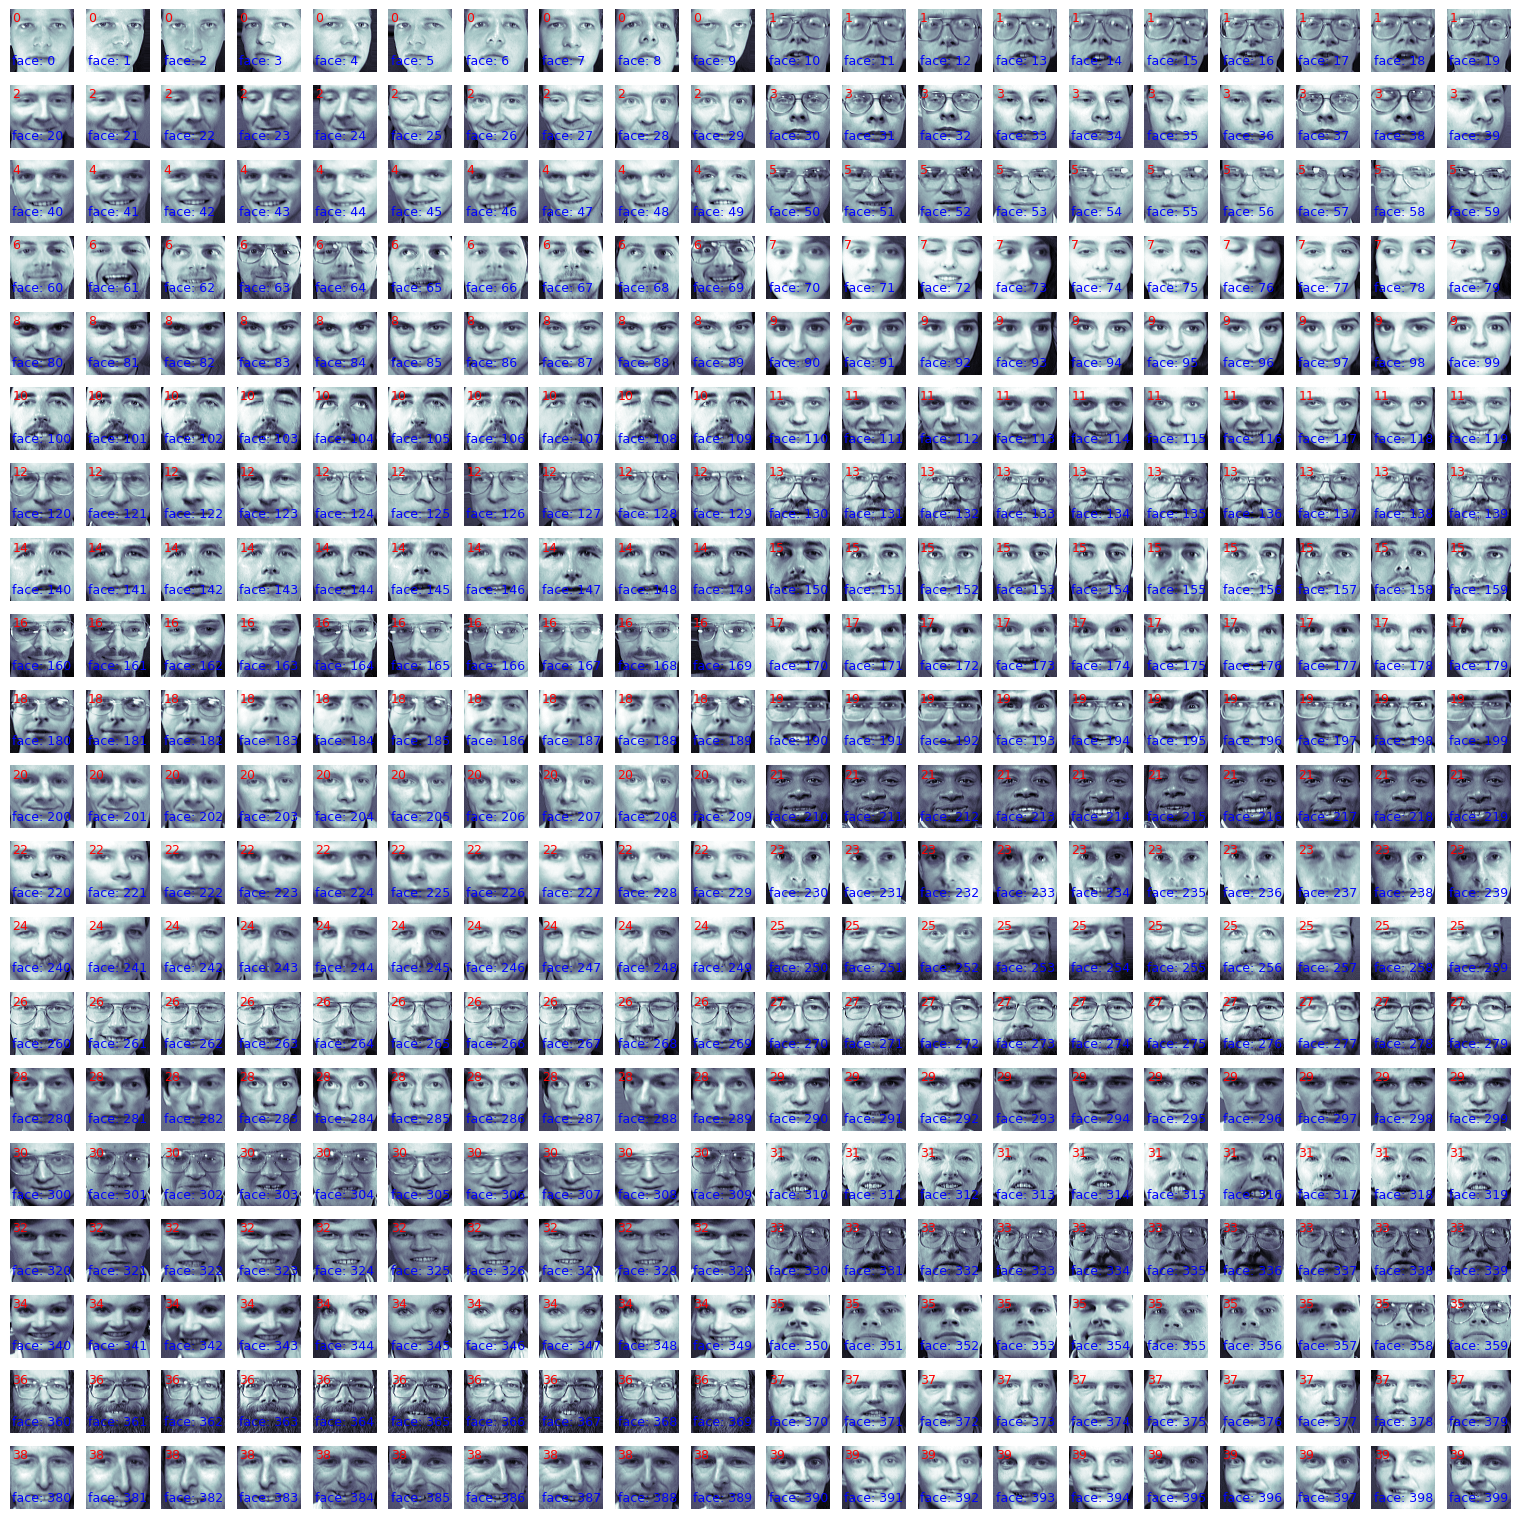

In [10]:
print_faces(data.images,data.target,400)

In [12]:
#let us extract unique charaters present in dataset 
def display_unique_faces(pics): 
    fig = plt.figure(figsize=(24, 10))  # Set figure size 
    columns, rows = 10, 4  # Define grid dimensions 
 
    # Loop through grid positions and plot each image 
    for i in range(1, columns * rows + 1): 
        img_index = 10 * i - 1  # Calculate the image index 
        if img_index < pics.shape[0]:  # Check for valid image index 
            img = pics[img_index, :, :] 
            ax = fig.add_subplot(rows, columns, i) 
            ax.imshow(img, cmap='gray') 
            ax.set_title(f"Person {i}", fontsize=14) 
            ax.axis('off') 
 
    plt.suptitle("There are 40 distinct persons in the dataset", fontsize=24) 
    plt.show()

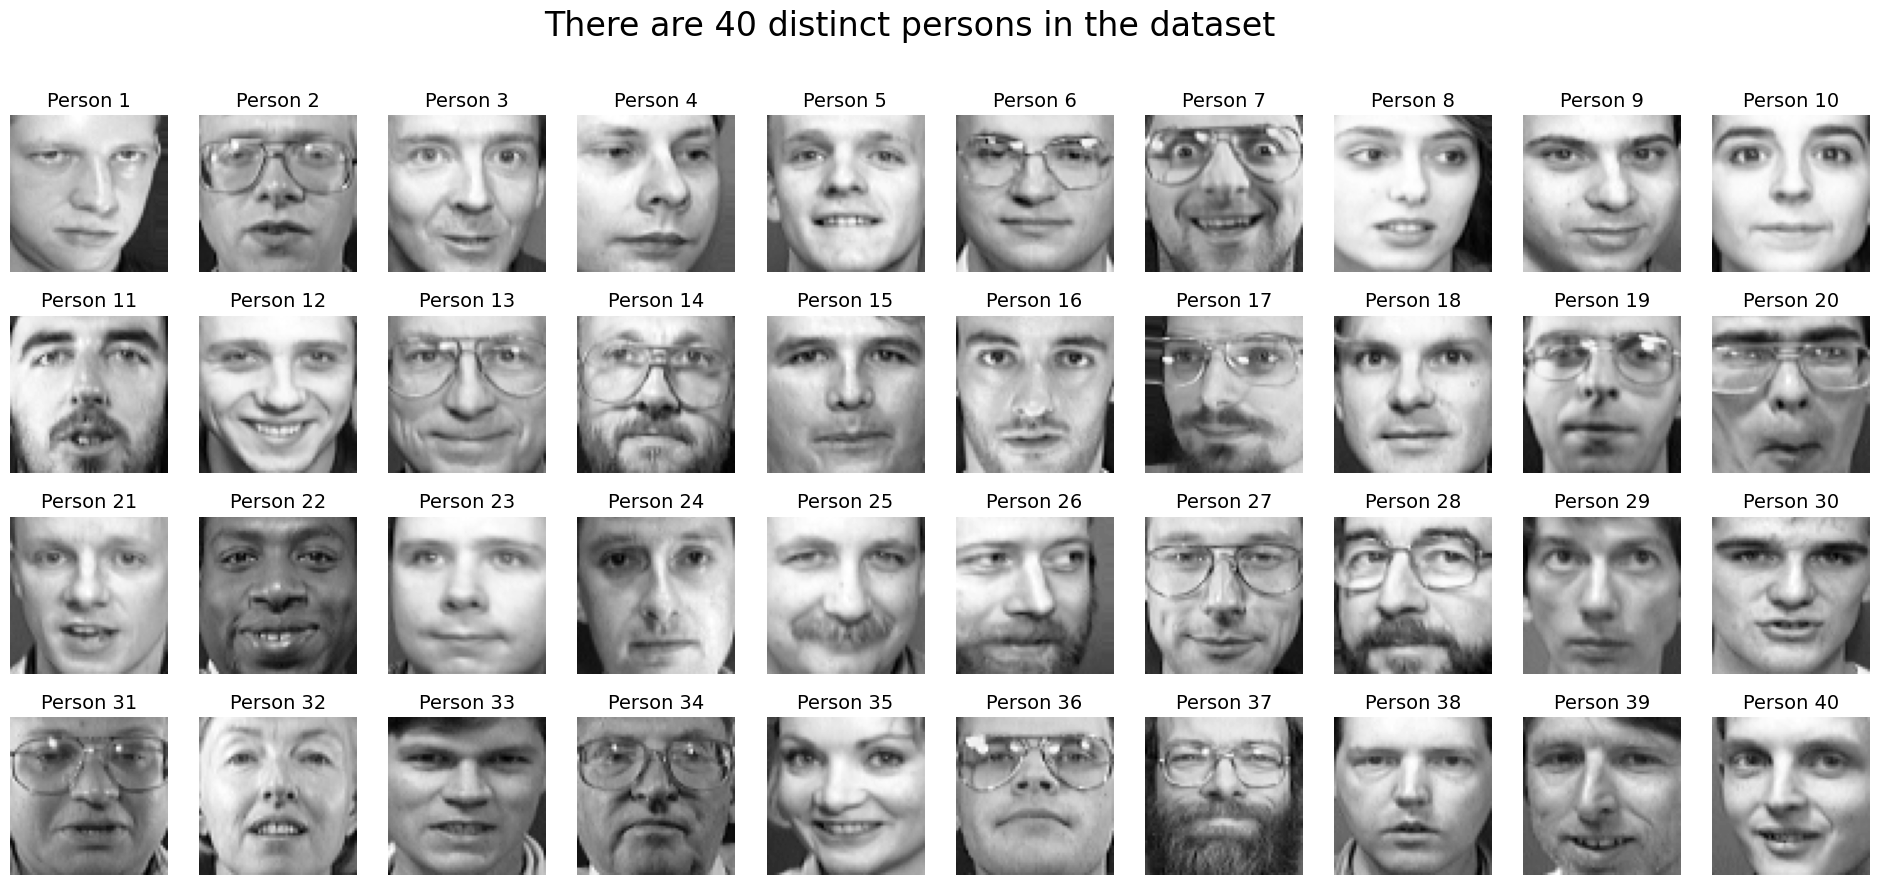

In [13]:
display_unique_faces(data.images) 


In [14]:
from sklearn.model_selection import train_test_split 
X = data.data 
Y = data.target 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, 
random_state=46) 
 
print("x_train: ",x_train.shape) 
print("x_test: ",x_test.shape) 

x_train:  (280, 4096)
x_test:  (120, 4096)


In [16]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix, accuracy_score 
 
# Train the model 
nb = GaussianNB() 
nb.fit(x_train, y_train) 
# Predict the test set results 
y_pred = nb.predict(x_test) 
# Calculate accuracy 
nb_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2) 
# Display the confusion matrix 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix:") 
print(cm)
print(f"Naive Bayes Accuracy: {nb_accuracy}%") 

Confusion Matrix:
[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]
Naive Bayes Accuracy: 73.33%


In [18]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
# Initialize and fit Multinomial Naive Bayes 
nb = MultinomialNB() 
nb.fit(x_train, y_train) 
# Predict the test set results 
y_pred = nb.predict(x_test) 
# Calculate accuracy 
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2) 
print(f"Multinomial Naive Bayes Accuracy: {accuracy}%")

Multinomial Naive Bayes Accuracy: 85.83%


In [19]:
misclassified_idx = np.where(y_pred != y_test)[0] 
num_misclassified = len(misclassified_idx) 
# Print the number of misclassified images and accuracy 
print(f"Number of misclassified images: {num_misclassified}") 
print(f"Total images in test set: {len(y_test)}") 
print(f"Accuracy: {round((1 - num_misclassified / len(y_test)) * 100, 2)}%") 
# Visualize some of the misclassified images 
n_misclassified_to_show = min(num_misclassified, 5) 

Number of misclassified images: 17
Total images in test set: 120
Accuracy: 85.83%


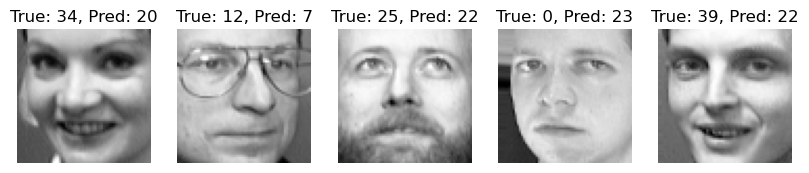

In [21]:
plt.figure(figsize=(10, 5)) 
for i in range(n_misclassified_to_show): 
    idx = misclassified_idx[i] 
    plt.subplot(1, n_misclassified_to_show, i + 1) 
    plt.imshow(x_test[idx].reshape(64, 64), cmap='gray') 
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}") 
    plt.axis('off') 
plt.show() 

In [23]:
from sklearn.preprocessing import label_binarize 
from sklearn.metrics import roc_auc_score 
# Binarize the test labels 
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)) 
# Get predicted probabilities for each class 
y_pred_prob = nb.predict_proba(x_test) 
# Calculate and print AUC for each class 
for i in range(y_test_bin.shape[1]): 
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]) 
    print(f"Class {i} AUC: {roc_auc:.2f}")

Class 0 AUC: 0.92
Class 1 AUC: 1.00
Class 2 AUC: 1.00
Class 3 AUC: 1.00
Class 4 AUC: 1.00
Class 5 AUC: 1.00
Class 6 AUC: 1.00
Class 7 AUC: 1.00
Class 8 AUC: 1.00
Class 9 AUC: 1.00
Class 10 AUC: 1.00
Class 11 AUC: 1.00
Class 12 AUC: 0.87
Class 13 AUC: 1.00
Class 14 AUC: 1.00
Class 15 AUC: 1.00
Class 16 AUC: 0.65
Class 17 AUC: 0.16
Class 18 AUC: 0.36
Class 19 AUC: 0.89
Class 20 AUC: 0.52
Class 21 AUC: 0.81
Class 22 AUC: 0.13
Class 23 AUC: 0.34
Class 24 AUC: 0.64
Class 25 AUC: 0.55
Class 26 AUC: 0.48
Class 27 AUC: 0.38
Class 28 AUC: 0.62
Class 29 AUC: 0.73
Class 30 AUC: 0.55
Class 31 AUC: 0.17
Class 32 AUC: 0.47
Class 33 AUC: 0.67
Class 34 AUC: 0.31
Class 35 AUC: 0.03
Class 36 AUC: 0.91
Class 37 AUC: 0.87
Class 38 AUC: 0.47
